In [23]:
import numpy as np
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt

import lightgbm as lgb
from sklearn import svm
import xgboost as xgb

from sklearn.ensemble import VotingRegressor, VotingClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [24]:
def load_data(y):
    path = '../../data/std_data/'
    x_train_std = pd.read_pickle(path +'train/{}_x.pkl'.format(str(y))).values
    x_test_std = pd.read_pickle(path +'test/{}_x.pkl'.format(str(y))).values
    y_train = pd.read_pickle(path +'train/{}_y.pkl'.format(str(y))).values
    y_test = pd.read_pickle(path +'test/{}_y.pkl'.format(str(y))).values
    features = pd.read_pickle(path +'train/{}_x.pkl'.format(str(y))).columns
    return x_train_std, x_test_std, y_train, y_test, features

In [25]:
def plot_roc_curve(fpr, tpr, auc):
    # ROC曲線をプロット
    plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
    plt.legend()
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.show()

In [35]:
def create_models():
    
    sv = svm.SVR(kernel="sigmoid",
                                 degree=4,
                                 gamma=0.043502212815589775,
                                 coef0=0.20190829020616494,
                                 tol=0.0001,
                                 C=0.000245786293391316,
                                 epsilon=0.3056167642389302,
                                verbose=True,)

    xgboost = xgb.XGBRegressor(silent= True, 
                           max_depth=4,
                           learning_rate=0.12765177534095626,
                           n_estimators = 46,
                           gamma=0.060805284848630535,
                           reg_lambda=4.995675788308118,
                           reg_alpha=2.1912254426545754,
                           sub_sample=0.45297631180790854,
                           scale_pos_weight=1.1672978934986058)

    lgbm = lgb.LGBMRegressor(
        random_state=0,
        verbosity=-1,
        bagging_seed=0,
        boost_from_average='true',
        metric='auc',
        bagging_freq=4,
        min_data_in_leaf=21,
        max_depth=13,
        learning_rate=0.08731913651405197,
        n_estimators=3394,
        subsample=0.7054763057027115,
        num_leaves=438,
        reg_lambda=0.9377125325944119,  
    )

#     estimators_rgs = [('sv', sv), ('xgboost', xgboost), ('lgbm', lgbm)]
    estimators_rgs = [('sv', sv), ('xgboost', xgboost), ('lgbm', lgbm)]
    
    return estimators_rgs

In [36]:
def main():
    
    
    path = '../../data/dataframes/std_data/'
#     df =  pd.read_pickle('../../data/dataframes/unificated_data_set.pkl')
    
    cm_all = np.zeros((2, 2))
    
    # 予測した確率全体を格納
    probs_all = np.array([])
    y_true_all = np.array([])
    
    for y in range(1978, 2020):
        
        # データの生成
        x_train, x_test, y_train, y_test, features = load_data(y)
       
        # 学習
        estimators= create_models()
        
        vr = VotingRegressor(estimators)

        vr.fit(x_train, y_train)
        
        # 予測(確率)
        probs = vr.predict(x_test)
        probs_all = np.hstack((probs_all, probs))
        y_true_all = np.hstack((y_true_all, y_test))
        
        print(probs)

        # 混同行列
        y_pred = np.where((probs ==  max(probs)), 1, 0) #確率→0/1
        cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
        cm_all += cm
    
    auc = roc_auc_score(y_true_all, probs_all)
    fpr, tpr, thresholds = roc_curve(y_true_all, probs_all)
    
    plot_roc_curve(fpr, tpr, auc)
    
    print("len: {0} , {1}".format(len(y_true_all), len(probs_all) ))
    print("confusion_matrix: ")
    print(cm_all)
    print("AUC: ")
    print(auc)
    print()
    return

[LibSVM][0.30695627 0.18663848 0.10632863 0.20459561 0.22759412]
[LibSVM][0.41533278 0.12242573 0.14756406 0.27662802 0.15506782]
[LibSVM][0.22995942 0.37832221 0.21227851 0.33984905 0.12067668]
[LibSVM][0.11301188 0.15110359 0.13775075 0.13772056 0.25436373]
[LibSVM][0.38670365 0.3182631  0.32304295 0.39914834 0.12581401]
[LibSVM][0.45182741 0.14387713 0.12794224 0.1517037  0.16263149]
[LibSVM][0.1230828  0.27240449 0.18700318 0.3012467  0.16802454]
[LibSVM][0.21789974 0.17793395 0.38883669 0.16551724 0.03830657]
[LibSVM][0.12846994 0.11391946 0.26706426 0.35304876 0.39276389]
[LibSVM][0.19099021 0.17481517 0.16097316 0.10655892 0.29517079]
[LibSVM][0.44195602 0.12409595 0.10296991 0.24426144 0.1820785 ]
[LibSVM][0.15693516 0.20994662 0.09543239 0.35270785 0.16408413]
[LibSVM][0.58261114 0.13991164 0.20732509 0.23844137 0.1401777 ]
[LibSVM][0.51029569 0.24499121 0.17960605 0.09736113 0.20046288]
[LibSVM][0.80968312 0.30726018 0.30590556 0.2650913  0.1254795 ]
[LibSVM][0.59202658 0.214

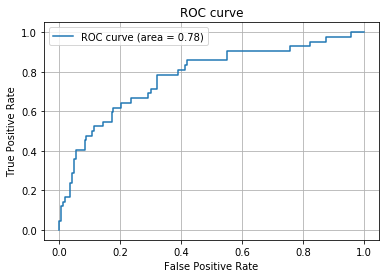

len: 211 , 211
confusion_matrix: 
[[149.  20.]
 [ 20.  22.]]
AUC: 
0.7774020850943928



In [37]:
main()

In [ ]:
# xgboost: 
# 0.7607072414764722

# svm
# 0.794590025359256

# lgbm
# 0.7602141448295294

# ('sv', sv), ('xgboost', xgboost),
# 0.7603550295857988

# ('xgboost', xgboost), ('lgbm', lgbm)
# 0.7772612003381234

# ('sv', sv), ('lgbm', lgbm)
# 0.7606367990983375

# ('sv', sv), ('xgboost', xgboost), ('lgbm', lgbm)
# 0.7774020850943928